In [ ]:
!pip install ogb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=f6d27df99fe5e898e8f1088090514bffe94642f3bb9a24796c7fe5bd84743a23
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.1 MB/s eta 0:00:00


In [ ]:
from ogb.graphproppred import PygGraphPropPredDataset
from torch_geometric.data import DataLoader

dataset = PygGraphPropPredDataset(name = "ogbg-code2")

split_idx = dataset.get_idx_split()
train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False)
test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False)

Downloaded 0.91 GB: 100%|██████████| 934/934 [01:02<00:00, 14.86it/s]


Extracting dataset/code2.zip


Processing...


Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 452741/452741 [00:02<00:00, 212847.95it/s]


Converting graphs into PyG objects...


100%|██████████| 452741/452741 [00:22<00:00, 20005.78it/s]


Saving...


Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
import torch_geometric
import networkx as nx

# New Section

In [ ]:
print(len(train_loader))

12750


In [ ]:
print(len(valid_loader))

714


In [ ]:
print(len(test_loader))

686


In [ ]:
print("# Node Features: ", dataset.num_node_features)
print("# Edge Features: ", dataset.num_edge_features)

# Node Features:  2
# Edge Features:  0


In [ ]:
dataset[0].edge_attrs

<bound method BaseData.edge_attrs of Data(edge_index=[2, 243], x=[244, 2], node_is_attributed=[244, 1], node_dfs_order=[244, 1], node_depth=[244, 1], y=[1], num_nodes=244)>

In [ ]:
dataset[0].node_attrs

<bound method BaseData.node_attrs of Data(edge_index=[2, 243], x=[244, 2], node_is_attributed=[244, 1], node_dfs_order=[244, 1], node_depth=[244, 1], y=[1], num_nodes=244)>

In [ ]:
dataset.x[:10] # take a look at the input

tensor([[   59, 10028],
        [   35,  1461],
        [   93, 10028],
        [   92, 10029],
        [   92, 10029],
        [   92,  6186],
        [   92, 10029],
        [   92,  9606],
        [   62, 10028],
        [   62, 10028]])

In [14]:
dataset.y[:10] # take a look at the labels

[['train'],
 ['predict'],
 ['show', 'prediction', 'labels', 'on', 'image'],
 ['rect', 'to', 'css'],
 ['trim', 'css', 'to', 'bounds'],
 ['face', 'distance'],
 ['load', 'image', 'file'],
 ['raw', 'face', 'locations'],
 ['face', 'locations'],
 ['batch', 'face', 'locations']]

In [ ]:
dataset[0]

Data(edge_index=[2, 243], x=[244, 2], node_is_attributed=[244, 1], node_dfs_order=[244, 1], node_depth=[244, 1], y=[1], num_nodes=244)

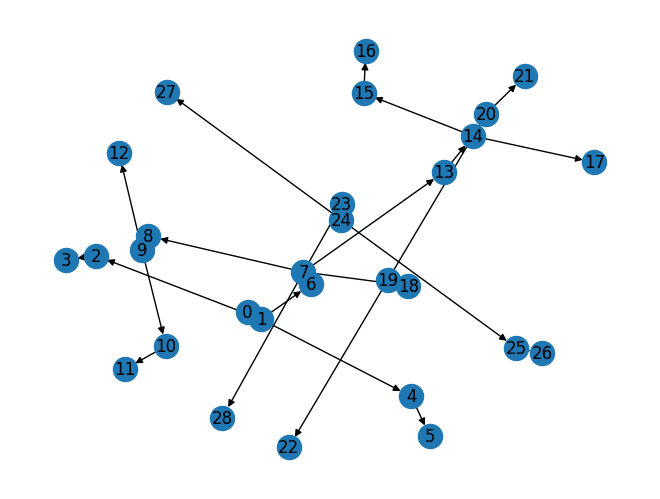

In [22]:
for i in range(100):
  if dataset[i].num_nodes < 50:
    net = torch_geometric.utils.to_networkx(dataset[i])
    nx.draw(net, with_labels = True)
    break

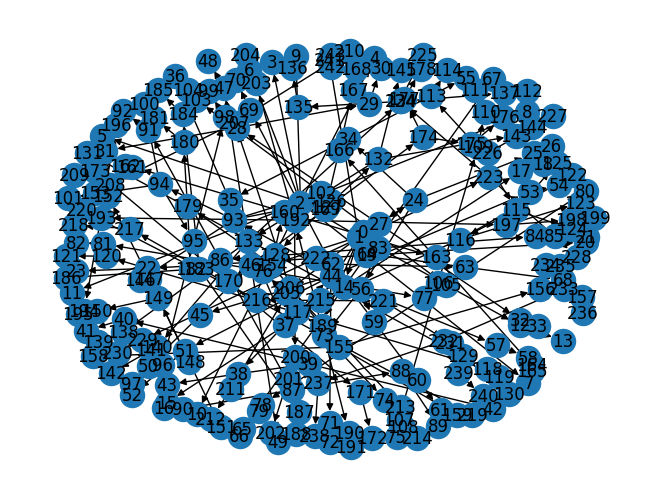

In [16]:
net = torch_geometric.utils.to_networkx(dataset[0])
nx.draw(net, with_labels = True)

In [20]:
degrees = [val for (node, val) in net.degree()]
print(degrees)

[1, 11, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 5, 2, 1, 3, 3, 2, 1, 1, 2, 1, 3, 3, 1, 3, 3, 3, 2, 1, 1, 1, 4, 3, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 6, 2, 1, 3, 2, 1, 4, 3, 3, 2, 1, 1, 1, 2, 1, 2, 1, 3, 2, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 2, 1, 1, 2, 1, 5, 4, 3, 2, 1, 2, 1, 1, 1, 3, 2, 1, 2, 3, 2, 1, 4, 3, 1, 1, 2, 1, 4, 4, 3, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 3, 2, 1, 1, 4, 4, 3, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3, 3, 2, 1, 1, 2, 1, 4, 4, 2, 1, 1, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 4, 2, 1, 1, 2, 1, 3, 2, 1, 5, 3, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 4, 3, 2, 1, 1, 2, 1, 2, 1, 3, 4, 2, 1, 1, 1, 3, 3, 4, 2, 1, 2, 1, 1, 2, 1, 2, 4, 3, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1]


In [ ]:
import pandas as pd
import os

mapping_dir = 'dataset/ogbg_code2/mapping'

attr_mapping = dict()
type_mapping = dict()

for line in pd.read_csv(os.path.join(mapping_dir, 'attridx2attr.csv.gz')).values:
    attr_mapping[int(line[0])] = line[1]

for line in pd.read_csv(os.path.join(mapping_dir, 'typeidx2type.csv.gz')).values:
    type_mapping[int(line[0])] = line[1]

In [ ]:
import itertools

dict(itertools.islice(attr_mapping.items(), 10))

{0: nan,
 1: nan,
 2: '\t',
 3: '\n',
 4: '\n\t',
 5: '\n\n',
 6: nan,
 7: '\r\n',
 8: ' ',
 9: '  '}

In [ ]:
dict(itertools.islice(type_mapping.items(), 10))

{0: 'Add',
 1: 'And',
 2: 'AnnAssign',
 3: 'Assert',
 4: 'Assign',
 5: 'AsyncFor',
 6: 'AsyncFunctionDef',
 7: 'AsyncWith',
 8: 'Attribute',
 9: 'AugAssign'}

In [ ]:
dataset[0].x[0]

tensor([   59, 10028])

In [ ]:
# example of decoded datapoint
print("Attr: ", type_mapping[dataset[0].x[0][0].item()])
print("Type: ", attr_mapping[dataset[0].x[0][1].item()])

Attr:  Module
Type:  __NONE__


# Augmentations
* add comment text to root node - attr would "#"
* add synonyms to text - need to find a mapping between a word and its synonyms
* number of lines - need to find newline symbols in attr_mapping
* maybe use dfs depth in some way - how many words are in this graph aka block of code; if dfs... does that mean following its order would give a sequential order through each line?



In [ ]:
# let's take a look at how it's set up in a readable format
for point in dataset[0].x:
  print("Attr: ", type_mapping[point[0].item()])
  print("Type: ", attr_mapping[point[1].item()])

In [ ]:
dataset[0].edge_index

In [ ]:
import torch
from torch_geometric.nn import MessagePassing
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool, global_add_pool
from torch_geometric.utils import degree

def augment_edge(data):
    '''
        Input:
            data: PyG data object
        Output:
            data (edges are augmented in the following ways):
                data.edge_index: Added next-token edge. The inverse edges were also added.
                data.edge_attr (torch.Long):
                    data.edge_attr[:,0]: whether it is AST edge (0) for next-token edge (1)
                    data.edge_attr[:,1]: whether it is original direction (0) or inverse direction (1)
    '''

    # AST edge
    edge_index_ast = data.edge_index
    edge_attr_ast = torch.zeros((edge_index_ast.size(1), 2))

    # Inverse AST edge
    edge_index_ast_inverse = torch.stack([edge_index_ast[1], edge_index_ast[0]], dim = 0)
    edge_attr_ast_inverse = torch.cat([torch.zeros(edge_index_ast_inverse.size(1), 1), torch.ones(edge_index_ast_inverse.size(1), 1)], dim = 1)


    # Next-token edge

    # Obtain attributed nodes and get their indices in dfs order
    # attributed_node_idx = torch.where(data.node_is_attributed.view(-1,) == 1)[0]
    # attributed_node_idx_in_dfs_order = attributed_node_idx[torch.argsort(data.node_dfs_order[attributed_node_idx].view(-1,))]

    # Since the nodes are already sorted in dfs ordering in our case, we can just do the following.
    attributed_node_idx_in_dfs_order = torch.where(data.node_is_attributed.view(-1,) == 1)[0]

    # build next token edge
    # Given: attributed_node_idx_in_dfs_order
    #        [1, 3, 4, 5, 8, 9, 12]
    # Output:
    #    [[1, 3, 4, 5, 8, 9]
    #     [3, 4, 5, 8, 9, 12]
    edge_index_nextoken = torch.stack([attributed_node_idx_in_dfs_order[:-1], attributed_node_idx_in_dfs_order[1:]], dim = 0)
    edge_attr_nextoken = torch.cat([torch.ones(edge_index_nextoken.size(1), 1), torch.zeros(edge_index_nextoken.size(1), 1)], dim = 1)


    # Inverse next-token edge
    edge_index_nextoken_inverse = torch.stack([edge_index_nextoken[1], edge_index_nextoken[0]], dim = 0)
    edge_attr_nextoken_inverse = torch.ones((edge_index_nextoken.size(1), 2))


    data.edge_index = torch.cat([edge_index_ast, edge_index_ast_inverse, edge_index_nextoken, edge_index_nextoken_inverse], dim = 1)
    data.edge_attr = torch.cat([edge_attr_ast,   edge_attr_ast_inverse, edge_attr_nextoken,  edge_attr_nextoken_inverse], dim = 0)

    return data

In [ ]:
augmented_dataset = augment_edge(dataset[0])

In [ ]:
augmented_dataset.edge_index

# second vector is a list of nodes that is 1 hop away from the first vectors' nodes

tensor([[  0,   1,   1,  ..., 237, 239, 242],
        [  1,   2,  12,  ..., 234, 237, 239]])

In [ ]:
augmented_dataset.edge_attr

# left means whether it's original or new edge
# right means whether direction is original or inverted

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]])

When we implement the actual code, we can include the augmentation as a transform layer:

dataset.transform = transforms.Compose([augment_edge, lambda data: encode_y_to_arr(data, vocab2idx, args.max_seq_len)])